In [2]:
!pip install opencv-python

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers  import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from keras import Sequential
from tensorflow import keras



In [2]:
img = image.load_img("C:/Users/india/Desktop/CNN memrostor/basedata/training/inverter/5.jpeg")

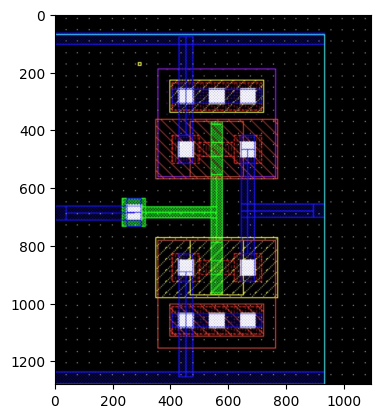

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("C:/Users/india/Desktop/CNN memrostor/basedata/training/inverter/5.jpeg").shape

(1280, 1095, 3)

In [5]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [6]:
train_dataset = train.flow_from_directory('Desktop/CNN memrostor/basedata/training/',
                                          target_size = (200,200),
                                          batch_size = 3, 
                                          class_mode = 'binary')

validation_dataset = train.flow_from_directory('Desktop/CNN memrostor/basedata/validation/',
                                          target_size = (200,200),
                                          batch_size = 3, 
                                          class_mode = 'binary')

Found 17 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


In [7]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(1,activation = 'sigmoid') ])

In [8]:
model.compile(loss= 'binary_crossentropy',
                     optimizer = RMSprop(learning_rate=0.001),
                      metrics =['accuracy'])

In [9]:
history = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs=10, validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 2s 551ms/step - loss: 3.0458 - accuracy: 0.3333 - val_loss: 0.7179 - val_accuracy: 0.4118
Epoch 2/10
3/3 [==============================] - 1s 375ms/step - loss: 0.6395 - accuracy: 0.6667 - val_loss: 0.5245 - val_accuracy: 0.7059
Epoch 3/10
3/3 [==============================] - 1s 390ms/step - loss: 0.5719 - accuracy: 0.7500 - val_loss: 0.5661 - val_accuracy: 0.7059
Epoch 4/10
3/3 [==============================] - 1s 362ms/step - loss: 0.8237 - accuracy: 0.7778 - val_loss: 0.3766 - val_accuracy: 0.8235
Epoch 5/10
3/3 [==============================] - 1s 348ms/step - loss: 0.4719 - accuracy: 0.7500 - val_loss: 0.3285 - val_accuracy: 0.9412
Epoch 6/10
3/3 [==============================] - 1s 345ms/step - loss: 0.2111 - accuracy: 1.0000 - val_loss: 0.2710 - val_accuracy: 0.9412
Epoch 7/10
3/3 [==============================] - 1s 348ms/step - loss: 0.3858 - accuracy: 0.8889 - val_loss: 0.2057 - val_accuracy: 0.9412
Epoch 8/10
3/3 [====

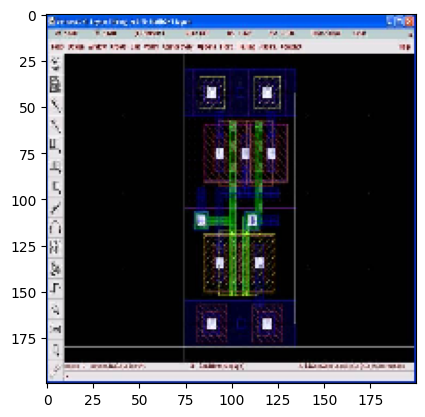

1/1 [==============================] - 0s 133ms/step
universal gates


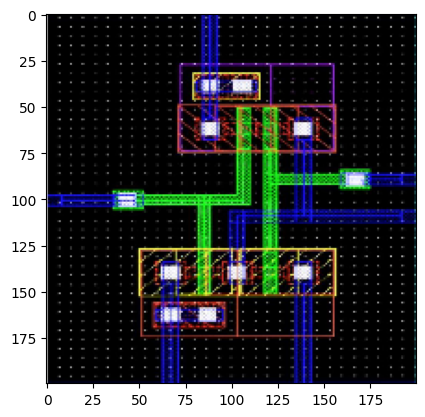

1/1 [==============================] - 0s 56ms/step
universal gates


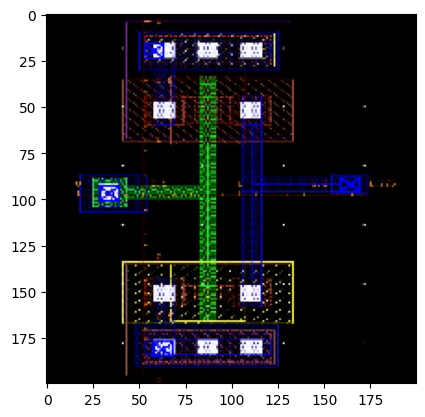

1/1 [==============================] - 0s 50ms/step
inverter


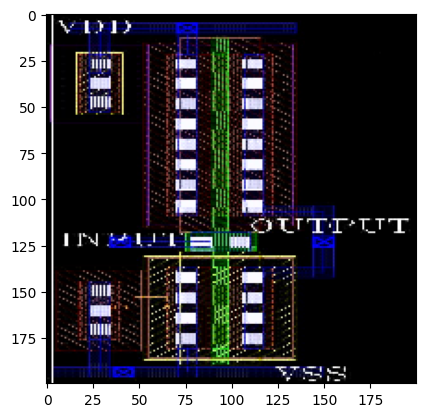

1/1 [==============================] - 0s 32ms/step
inverter


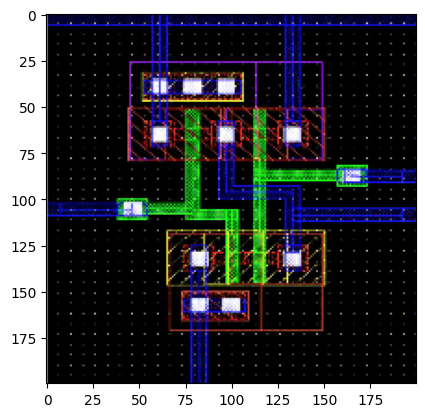

1/1 [==============================] - 0s 48ms/step
universal gates


In [10]:
dir_path = 'C:/Users/india/Desktop/CNN memrostor/basedata/testing/happy'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//' + i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis =0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("inverter")
    else:
        print("universal gates")
    
    
 

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
import matplotlib.pyplot as plt

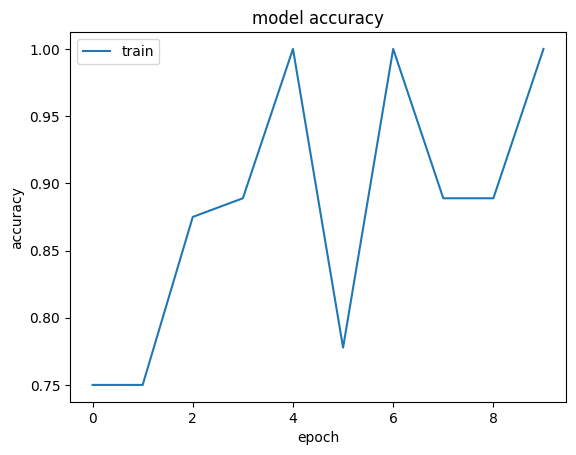

In [19]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

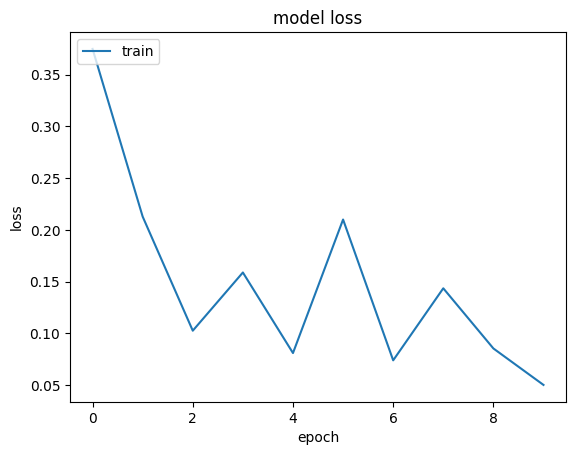

In [20]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()